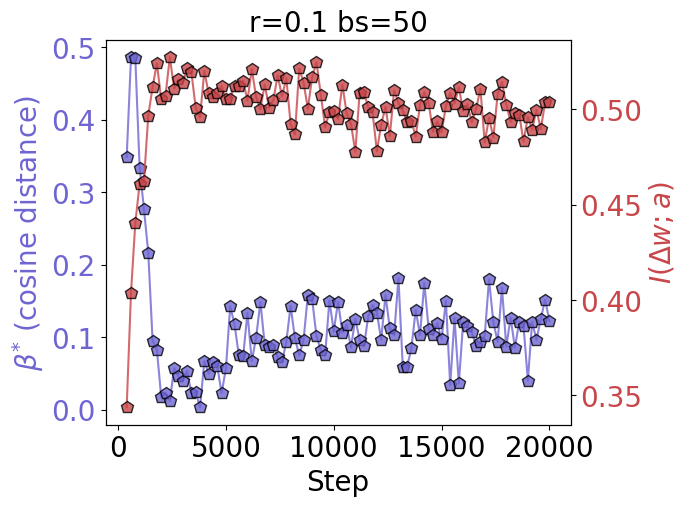

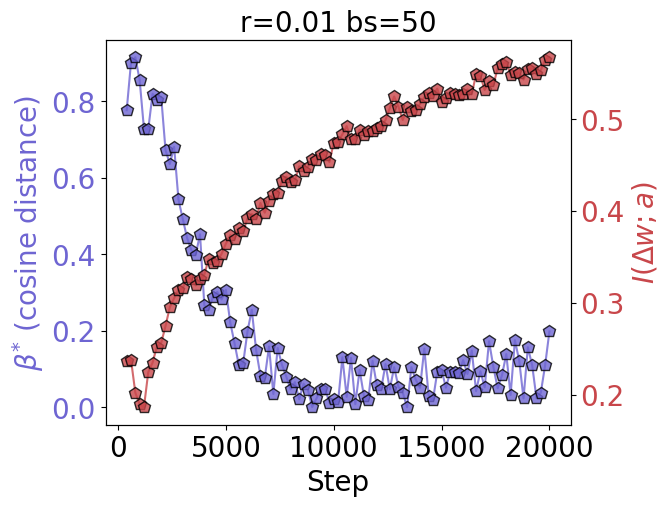

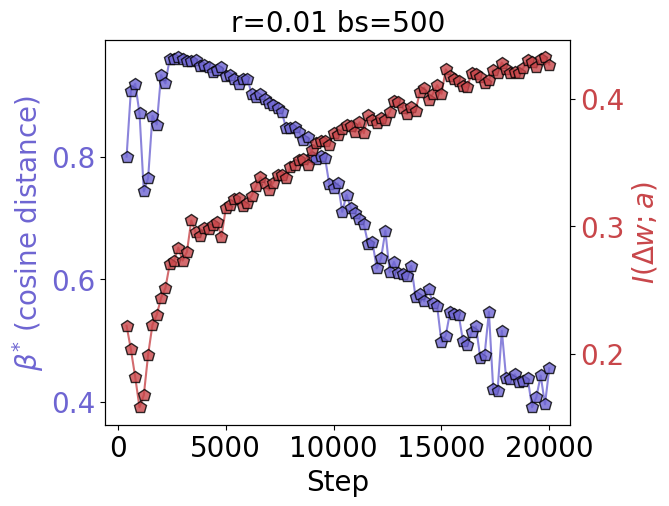

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA

opti = 'PureSGD'

for bs in [50, 500]:
    if bs == 50:
        lrlist = [0.1, 0.01]
    elif bs == 500:
        lrlist = [0.01]
    for lr in lrlist:
        fig, ax1 = plt.subplots(figsize=(6, 5))
        ft=20
        color = "#6e65d2"
        pca_cosine_dist = np.load(f'submission_pca_{opti}_lr{lr}_bs{bs}.npy')
        xrange = np.arange(2, len(pca_cosine_dist)+2) * 200
        if bs == 50:
            ax1.plot(xrange, pca_cosine_dist, 'p-', mfc=color, mec='black', color=color, markersize=9, alpha=0.8,label='Cosine Distance')
        elif bs == 500:
            ax1.plot(xrange, pca_cosine_dist, 'p-', mfc=color, mec='black', color=color, markersize=9, alpha=0.8,label='Cosine Distance')

        ax1.set_ylabel(r'$\beta^{*}$ (cosine distance)', color=color,fontsize=ft)
        ax1.set_xlabel('Step', fontsize=ft)
        ax1.tick_params(axis='y', labelcolor=color)

        ax1.tick_params(axis='x', labelsize=ft)
        ax1.tick_params(axis='y', labelsize=ft)


        ax2 = ax1.twinx()
        color = "#c8464a"
        mi=np.load(f'submission_mi_{opti}_lr{lr}_bs{bs}.npy')
        xrange = np.arange(2, len(mi)+2) * 200

        if bs == 50:
            ax2.plot(xrange, mi, 'p-', mfc=color, mec='black', color=color, markersize=9, alpha=0.8,label='Cosine Distance')
        elif bs == 500:
            ax2.plot(xrange, mi, 'p-', mfc=color, mec='black', color=color, markersize=9, alpha=0.8,label='Cosine Distance')

        ax2.set_ylabel(r'$I$($\Delta w; a$)', color=color,fontsize=ft)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.tick_params(axis='y', labelsize=ft)
        plt.title(f'r={lr} bs={bs}', fontsize=ft)
        plt.show()


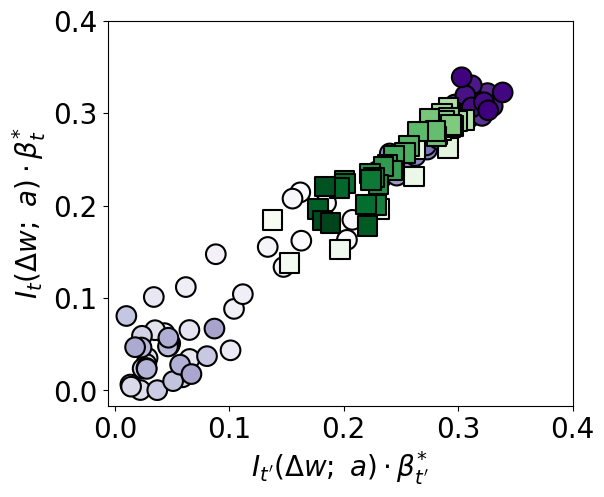

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import spearmanr


plt.subplots(figsize=(6, 5))
colors = ['#9387a7', '#00a98b','#d5cabd']
opti = 'PureSGD'
lr = 0.01
for bs in [50, 500]:

    mi = np.load(f'submission_{opti}_mi_bs{bs}_lr{lr}.npy')
    grad = np.load(f'submission_{opti}_grad_bs{bs}_lr{lr}.npy')

    ft=20
    n_points = len(mi)
    color_gradient = np.linspace(0, 1, n_points) 
    if bs == 50:
        cmap = plt.get_cmap('Purples')
        plt.scatter(mi, grad, marker='o', s=200, c=color_gradient, cmap=cmap, edgecolors='black', linewidth=1.5, label=f'r = {lr}, \nbs = {bs}')
    elif bs == 500:
        cmap = plt.get_cmap('Greens')
        plt.scatter(mi, grad, marker='s', s=200, c=color_gradient, cmap=cmap, edgecolors='black', linewidth=1.5, label=f'r = {lr}, \nbs = {bs}')

    plt.xlabel(r'$I_{t^\prime} (\Delta w;\ a) \cdot \beta^{*}_{t^\prime}$', fontsize=ft)
    plt.ylabel(r'$I_{t} (\Delta w;\ a) \cdot \beta^{*}_{t}$', fontsize=ft)
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=ft)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=ft)

plt.show()

/var/folders/lb/2w_ws19d5gj6kwkkm3xy5p1c0000gn/T/ipykernel_41200/2758129633.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="label", y="Difference", kind="boxen", data=df, palette=palette)


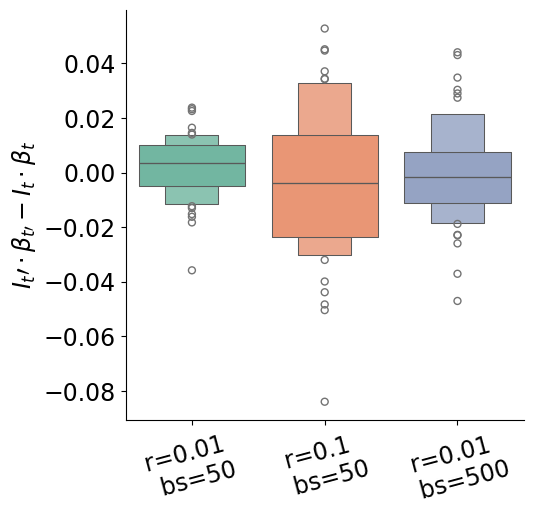

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns

ft = 17

df = pd.read_csv("output_difference.csv")
palette = sns.color_palette("Set2", n_colors=df['label'].nunique())

g = sns.catplot(x="label", y="Difference", kind="boxen", data=df, palette=palette)
ax = g.ax
ax.set_xlabel("")

ax.set_ylabel(r"$I_t{\prime} \cdot \beta_{t\prime} - I_t \cdot \beta_{t}$", fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(rotation=15, fontsize=ft)

plt.show()